#Import libraries

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.pandas.set_option('display.max_columns',None)

#Load dataset

In [59]:
dataset = pd.read_excel("recent_dataset.xlsx")
df = dataset
df.shape

(1409, 29)

In [60]:
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,incoming_salary,incoming_own_farm,incoming_business,incoming_0_business,Average Income,Passive Income,labor_primary,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,0_lasting_investmen,Asset,Asset range,Expenses,Expenses range,depressed2
0,1,1,Male,33,1,1,14,3,0,0,0,0,0.000000,0,1,3876037,17945222,22421519,25784746,7799485,93422985,29317024,32135156,22754727,192555646,AVERAGE,62901255,LOW,0
1,2,1,Male,19,1,2,6,4,1,0,0,1,0.333333,1,1,41303144,13372833,23399979,26692283,42280579,24023056,21353827,18750629,53384566,174234207,AVERAGE,90326689,LOW,0
2,3,1,Female,27,1,0,10,2,0,0,1,1,0.666667,1,0,33042515,2445547,23399979,25357668,28026897,13813256,62526674,32035825,27806684,132543806,LOW,115911239,AVERAGE,0
3,4,1,Male,26,1,2,10,4,1,0,0,1,0.333333,1,1,28912201,10490067,23399979,2936151,59417023,30028818,31363432,11130682,24023054,127984801,LOW,93716606,LOW,0
4,5,1,Male,23,1,4,10,6,1,0,0,0,0.000000,0,1,27090842,30557327,23399979,21353827,67424706,21353827,60502515,64246497,21264853,187913325,AVERAGE,149281048,AVERAGE,0


#Data preprocessing

In [61]:
cols_to_drop = ['Survey_id', 'Ville_id', 'incoming_own_farm', 'incoming_business', 'incoming_0_business', 'Average Income', 'gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_agricultural', 'farm_expenses', 'lasting_investment', '0_lasting_investmen', 'Asset', 'Expenses']
df.drop(cols_to_drop,axis=1,inplace=True)
df.head()

,sex,Age,Married,Number_children,education_level,total_members,incoming_salary,Passive Income,labor_primary,Asset range,Expenses range,depressed2
0,Male,33,1,1,14,3,0,0,1,AVERAGE,LOW,0
1,Male,19,1,2,6,4,1,1,1,AVERAGE,LOW,0
2,Female,27,1,0,10,2,0,1,0,LOW,AVERAGE,0
3,Male,26,1,2,10,4,1,1,1,LOW,LOW,0
4,Male,23,1,4,10,6,1,0,1,AVERAGE,AVERAGE,0


#EDA

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sex              1409 non-null   object
 1   Age              1409 non-null   int64 
 2   Married          1409 non-null   int64 
 3   Number_children  1409 non-null   int64 
 4   education_level  1409 non-null   int64 
 5   total_members    1409 non-null   int64 
 6   incoming_salary  1409 non-null   int64 
 7   Passive Income   1409 non-null   int64 
 8   labor_primary    1409 non-null   int64 
 9   Asset range      1409 non-null   object
 10  Expenses range   1409 non-null   object
 11  depressed2       1409 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 132.2+ KB


In [63]:
df.isna().sum()

sex                0
Age                0
Married            0
Number_children    0
education_level    0
total_members      0
incoming_salary    0
Passive Income     0
labor_primary      0
Asset range        0
Expenses range     0
depressed2         0
dtype: int64

##No null values present.

In [64]:
df.describe()

,Age,Married,Number_children,education_level,total_members,incoming_salary,Passive Income,labor_primary,depressed2
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000
mean,34.733854,0.774308,2.904897,8.697658,4.996451,0.176011,0.442867,0.209368,0.166785
std,13.800712,0.418186,1.872585,2.913673,1.772778,0.380965,0.496901,0.407002,0.372916
min,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,2.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,3.000000,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,1.000000,4.000000,10.000000,6.000000,0.000000,1.000000,0.000000,0.000000
max,91.000000,1.000000,11.000000,19.000000,12.000000,1.000000,1.000000,1.000000,1.000000


##Label encoding

In [65]:
cols_to_encode = ['sex']
df_labelled = df.copy()
from sklearn.preprocessing import LabelEncoder
df_labelled[cols_to_encode] = df[cols_to_encode].apply(LabelEncoder().fit_transform)
df = df_labelled
df.head()

,sex,Age,Married,Number_children,education_level,total_members,incoming_salary,Passive Income,labor_primary,Asset range,Expenses range,depressed2
0,1,33,1,1,14,3,0,0,1,AVERAGE,LOW,0
1,1,19,1,2,6,4,1,1,1,AVERAGE,LOW,0
2,0,27,1,0,10,2,0,1,0,LOW,AVERAGE,0
3,1,26,1,2,10,4,1,1,1,LOW,LOW,0
4,1,23,1,4,10,6,1,0,1,AVERAGE,AVERAGE,0


In [66]:
Asset_range = {"LOW":0, "AVERAGE":1, "HIGH":2}
df["Asset range"] = df["Asset range"].map(Asset_range)
df.head()

,sex,Age,Married,Number_children,education_level,total_members,incoming_salary,Passive Income,labor_primary,Asset range,Expenses range,depressed2
0,1,33,1,1,14,3,0,0,1,1,LOW,0
1,1,19,1,2,6,4,1,1,1,1,LOW,0
2,0,27,1,0,10,2,0,1,0,0,AVERAGE,0
3,1,26,1,2,10,4,1,1,1,0,LOW,0
4,1,23,1,4,10,6,1,0,1,1,AVERAGE,0


In [67]:
Expenses_range = {"LOW":0, "AVERAGE":1, "HIGH":2}
df["Expenses range"] = df["Expenses range"].map(Expenses_range)
df.head()

,sex,Age,Married,Number_children,education_level,total_members,incoming_salary,Passive Income,labor_primary,Asset range,Expenses range,depressed2
0,1,33,1,1,14,3,0,0,1,1,0,0
1,1,19,1,2,6,4,1,1,1,1,0,0
2,0,27,1,0,10,2,0,1,0,0,1,0
3,1,26,1,2,10,4,1,1,1,0,0,0
4,1,23,1,4,10,6,1,0,1,1,1,0


In [68]:
df['depressed2'].value_counts()

0    1174
1     235
Name: depressed2, dtype: int64

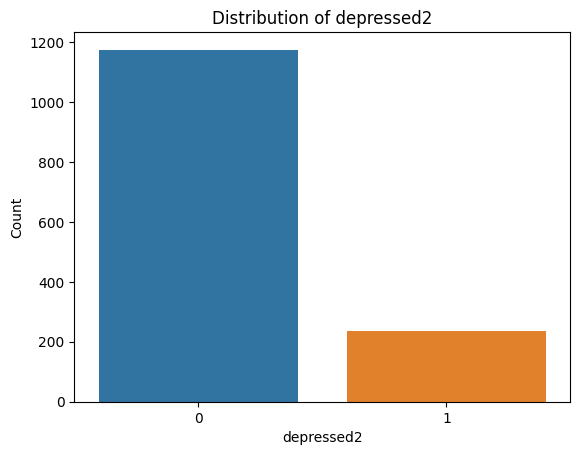

In [69]:
sns.countplot(x='depressed2', data=df)
plt.title('Distribution of depressed2')
plt.xlabel('depressed2')
plt.ylabel('Count')
plt.show()


##This is an imbalanced dataset.

##Lets use SMOTE to balance data.

In [70]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(df.drop('depressed2',axis=1),df['depressed2'])
df1_ = pd.DataFrame(X,columns = df.drop('depressed2',axis=1).columns)
df2_ = pd.DataFrame(y, columns = ['depressed2'])
after_smote_df = pd.concat([df1_, df2_], axis=1)
after_smote_df.head()

,sex,Age,Married,Number_children,education_level,total_members,incoming_salary,Passive Income,labor_primary,Asset range,Expenses range,depressed2
0,1,33,1,1,14,3,0,0,1,1,0,0
1,1,19,1,2,6,4,1,1,1,1,0,0
2,0,27,1,0,10,2,0,1,0,0,1,0
3,1,26,1,2,10,4,1,1,1,0,0,0
4,1,23,1,4,10,6,1,0,1,1,1,0


In [71]:
print("INITIAL DATA SHAPE : ", df.shape)
print("AFTER SMOTE SHAPE : ", after_smote_df.shape)

INITIAL DATA SHAPE :  (1409, 12)
AFTER SMOTE SHAPE :  (2348, 12)


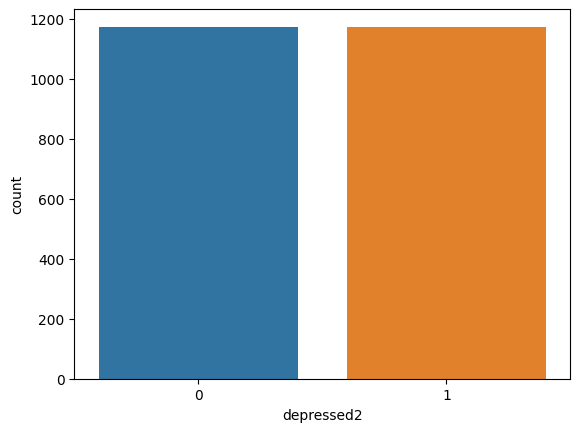

In [72]:
sns.countplot(x= 'depressed2',data = after_smote_df)
plt.show()

In [73]:
# Creating a copy of smote_df
fdf = after_smote_df
fdf.isnull().sum()

sex                0
Age                0
Married            0
Number_children    0
education_level    0
total_members      0
incoming_salary    0
Passive Income     0
labor_primary      0
Asset range        0
Expenses range     0
depressed2         0
dtype: int64

In [74]:
# Checking for Duplicates
fdf.duplicated().sum()

440

In [75]:
def draw_hist(df:pd.DataFrame):
    fig, axs = plt.subplots(4, 3, figsize = (15, 12))
    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.histplot(x=column, data=df, ax=axs[row_index, col_index], alpha=0.5, kde=True)
        axs[row_index, col_index].set_title(f'Hist Plot of {column}')
    plt.tight_layout()
    plt.show()

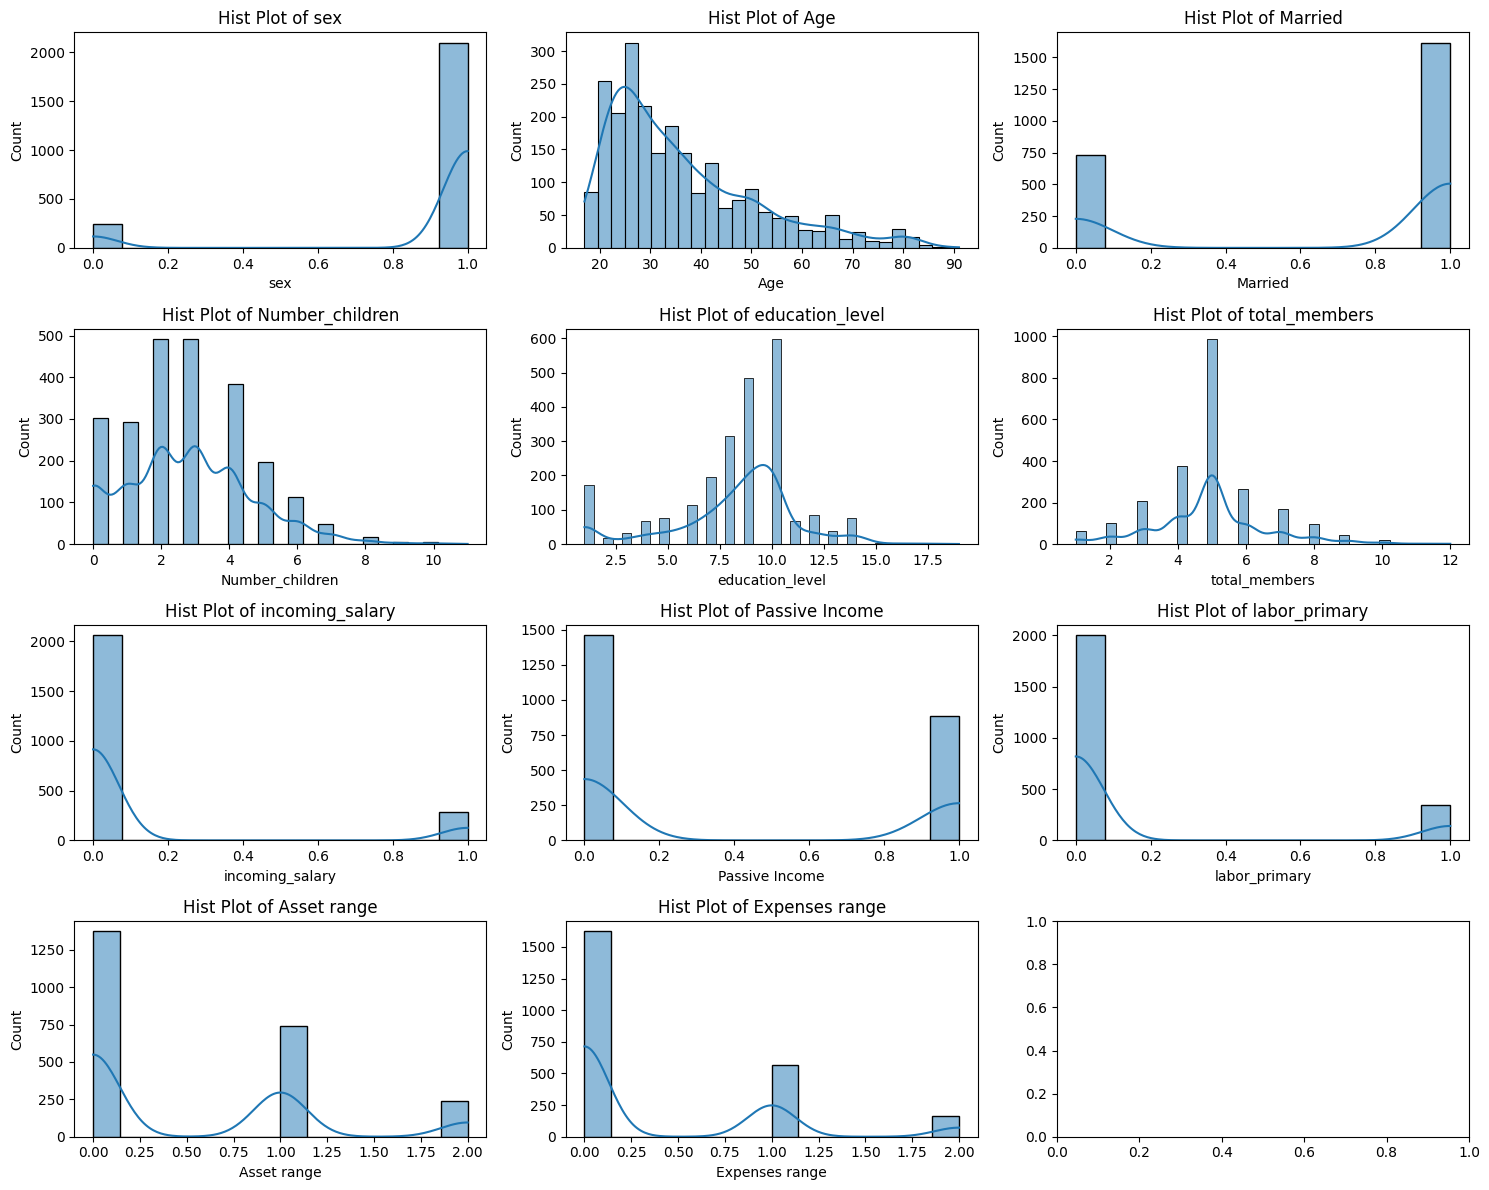

In [76]:
draw_hist(fdf)

In [77]:
fdf.skew()

sex               -2.567929
Age                1.166869
Married           -0.815451
Number_children    0.515292
education_level   -0.728451
total_members      0.427736
incoming_salary    2.320263
Passive Income     0.504548
labor_primary      1.995777
Asset range        0.937826
Expenses range     1.381582
depressed2         0.000000
dtype: float64

In [78]:
# We will deal with skeweness later first viaulize the outliers
def show_boxplots(df:pd.DataFrame):
    fig, axs = plt.subplots(4, 3, figsize = (15, 12))

    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.boxplot(y=column, data=df, ax=axs[row_index, col_index])
        axs[row_index, col_index].set_title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

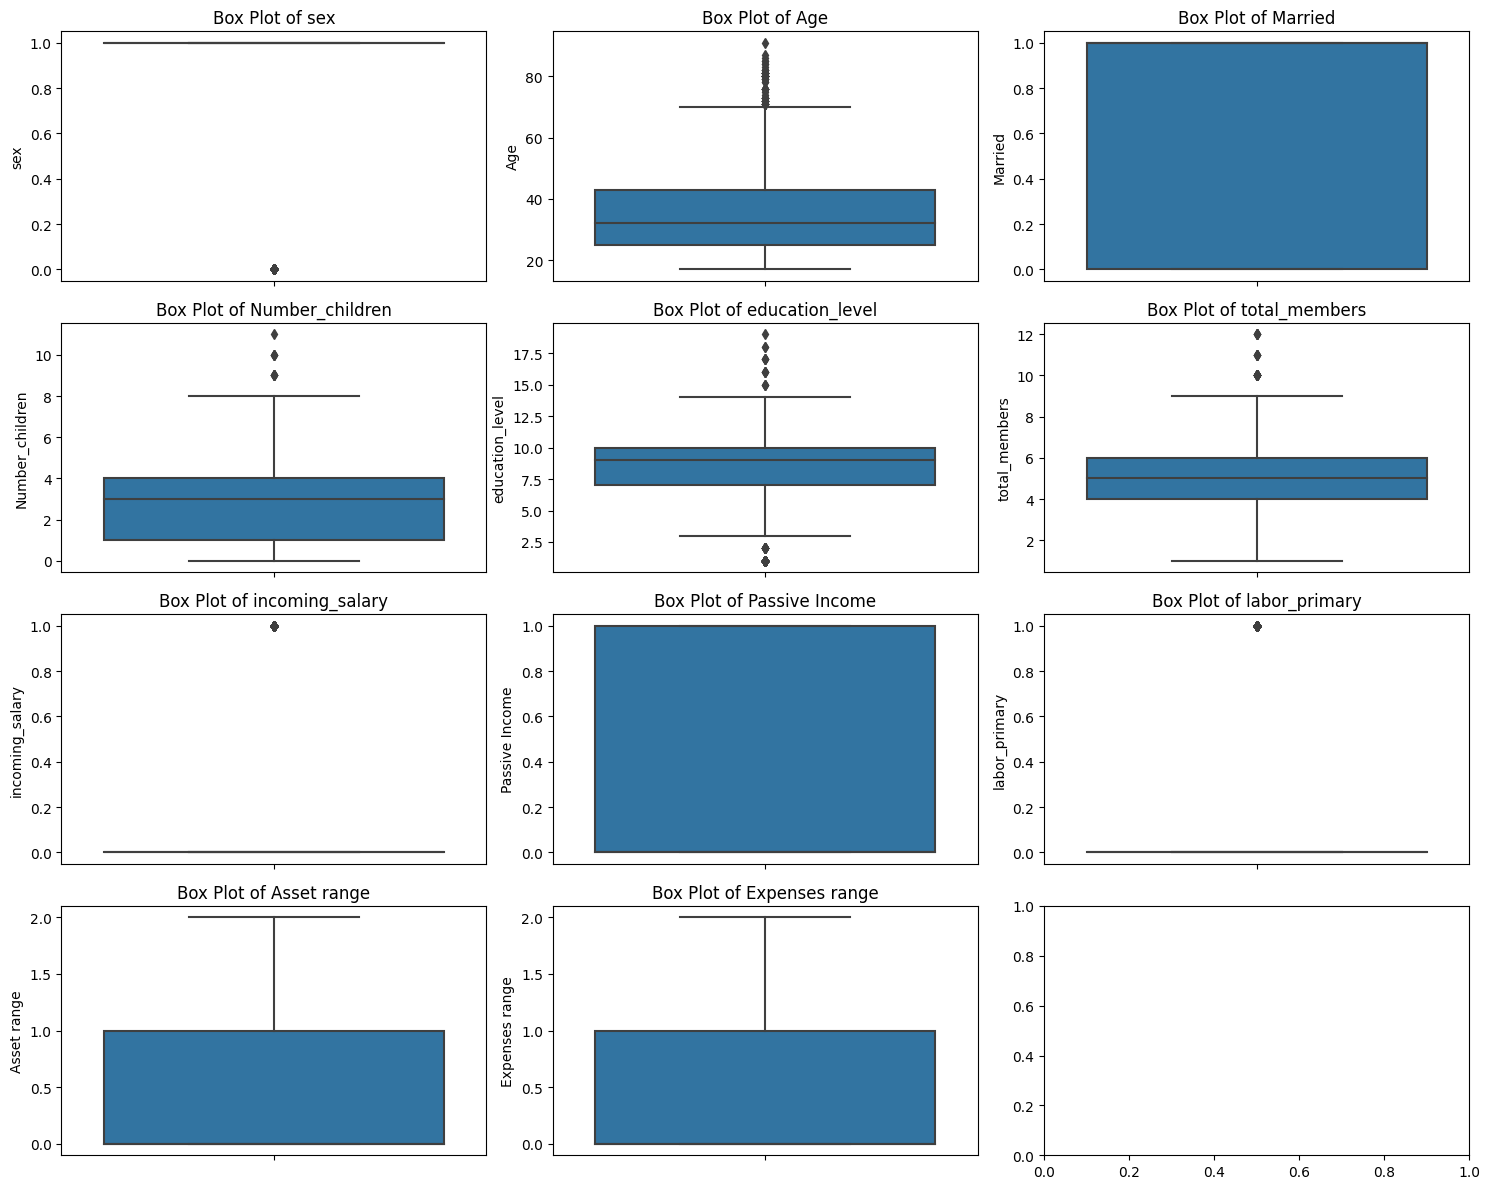

In [79]:
show_boxplots(fdf)

##Outliers

In [112]:
def get_iqr_thresholds(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    upper_fence = q3 + 1.5 * IQR
    return lower_fence, upper_fence

In [113]:
# Outliers are in 5 columns, we can get them using the following method
def get_outliers_count(df: pd.DataFrame):
#     desc_df = fdf.describe()
    outliers_count = {}

    for column in df.columns[:-1]:
        lower_fence, upper_fence = get_iqr_thresholds(df,column)

        # Count outliers in the column
        outlier_count = df[(df[column] < lower_fence) | (df[column] > upper_fence)][column].count()

        outliers_count[column] = outlier_count


    return outliers_count

In [114]:
cols_to_find_ouliers = ['Age', 'Number_children', 'education_level', 'total_members' ]
ds = fdf[cols_to_find_ouliers]
outliers = get_outliers_count(ds)
outliers
# You can verify these in the plot as well

{'Age': 91, 'Number_children': 11, 'education_level': 203}

In [115]:
# Replacing with median as outliers are in numerical features
def impute_outliers_with_median(df: pd.DataFrame, outliers_count_dict: dict):
    for column, outlier_count in outliers_count_dict.items():
        if outlier_count > 2:
            lower_fence, upper_fence = get_iqr_thresholds(df,column)
            # Impute outliers with median
            median_value = df[column].median()

            # Replace outliers in the entire DataFrame with median for the specified column
            df[column] = np.where((df[column] < lower_fence) | (df[column] > upper_fence), median_value, df[column])

    return df

In [ ]:
ds = impute_outliers_with_median(ds, outliers)

In [117]:
outliers = get_outliers_count(ds)
outliers

{'Age': 19, 'Number_children': 0, 'education_level': 175}

In [118]:
fdf['Number_children'] = ds['Number_children']

In [119]:
ds = ds.drop(['Number_children'],axis=1)

In [120]:
ds = impute_outliers_with_median(ds, outliers)

In [121]:
outliers = get_outliers_count(ds)
outliers

{'Age': 32, 'education_level': 0}

In [122]:
fdf['education_level'] = ds['education_level']

In [123]:
ds = ds.drop(['education_level'],axis=1)

In [124]:
ds = impute_outliers_with_median(ds, outliers)

In [125]:
outliers = get_outliers_count(ds)
outliers

{'Age': 35}

In [126]:
ds = impute_outliers_with_median(ds, outliers)

In [127]:
outliers = get_outliers_count(ds)
outliers

{'Age': 27}

In [128]:
ds = impute_outliers_with_median(ds, outliers)

In [129]:
outliers = get_outliers_count(ds)
outliers

{'Age': 0}

In [130]:
fdf['Age'] = ds['Age']

##Correlation

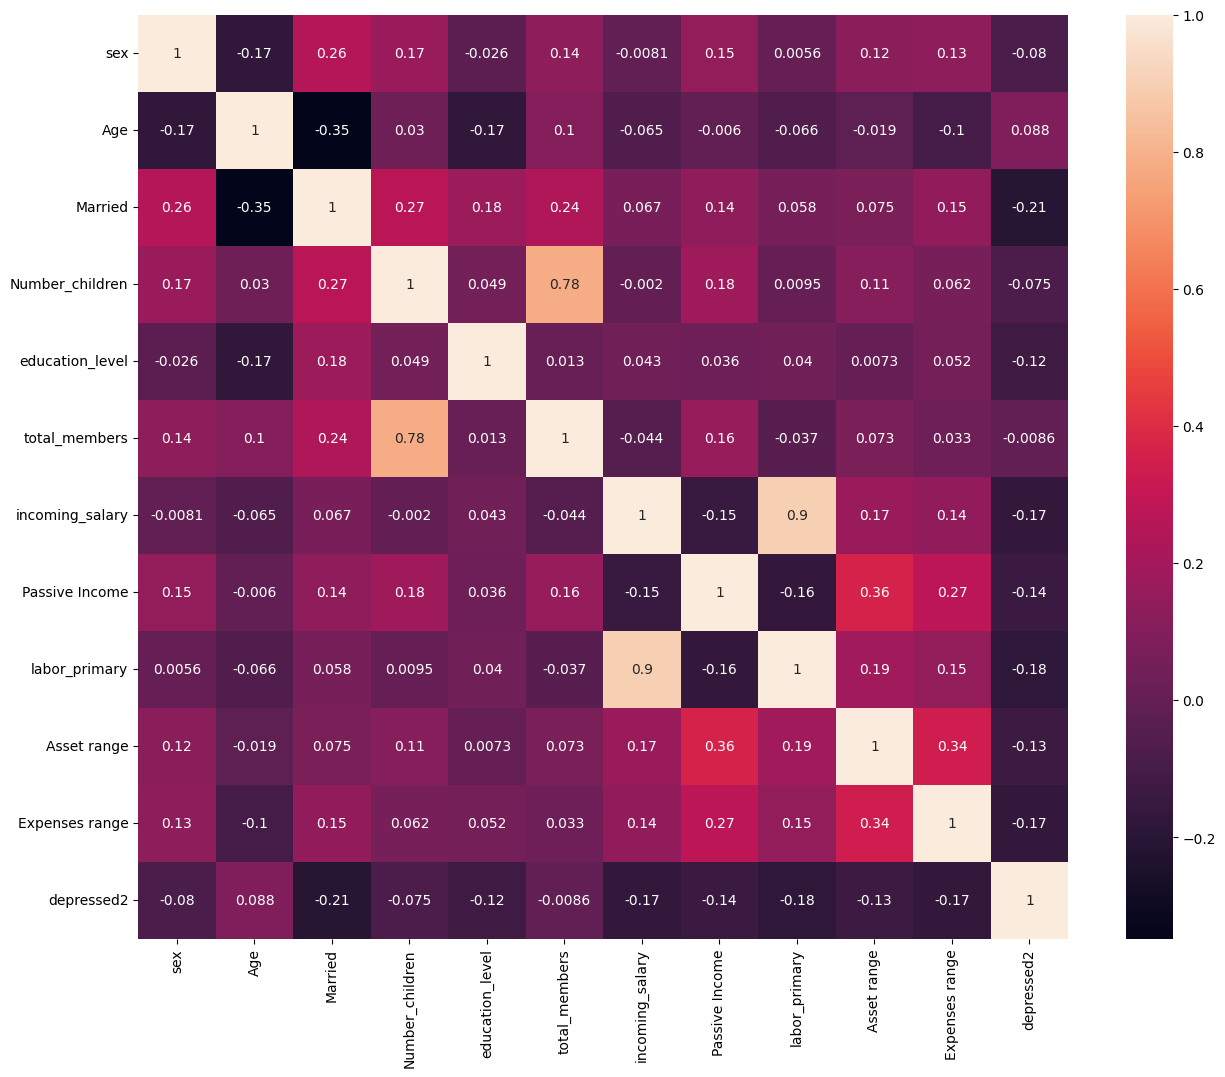

In [134]:
plt.figure(figsize=(15, 12))
sns.heatmap(fdf.corr(method='pearson'),annot=True)
plt.show()

##Training data

In [136]:
x = fdf.iloc[:,0:11].values
y = fdf.iloc[:,11].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

##Logistic regression classifier

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression(max_iter = 600)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.5914893617021276


##K nearest neighbours classifier

In [138]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.7404255319148936


##Decision tree classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.7510638297872341


##Naive Bayes classifier

In [140]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
y_pred_nb = model_nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.5808510638297872


##Support vector machine classifier

In [141]:
from sklearn.svm import SVC
model_svc = SVC(gamma='auto')
model_svc.fit(x_train,y_train)
y_pred_svc = model_svc.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.7212765957446808


##Random forest classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.7489361702127659


##Scaling data

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = [feature for feature in fdf.columns if feature not in ["depressed2"]]
features = fdf[col_names]
features = scaler.fit_transform(features)
scaled = pd.DataFrame(features, columns = col_names)
ds_scaled = fdf.copy()
ds_scaled[col_names] = scaled[col_names]
ds_scaled.head()

,sex,Age,Married,Number_children,education_level,total_members,incoming_salary,Passive Income,labor_primary,Asset range,Expenses range,depressed2
0,0.343650,0.016229,0.672363,-0.971665,0.058261,-1.156252,-0.371683,-0.779178,2.409522,0.718020,-0.619020,0
1,0.343650,-1.373017,0.672363,-0.416428,-1.895994,-0.565032,2.690464,1.283404,2.409522,0.718020,-0.619020,0
2,-2.909938,-0.579162,0.672363,-1.526902,0.709680,-1.747471,-0.371683,1.283404,-0.415020,-0.768674,1.015917,0
3,0.343650,-0.678394,0.672363,-0.416428,0.709680,-0.565032,2.690464,1.283404,2.409522,-0.768674,-0.619020,0
4,0.343650,-0.976090,0.672363,0.694046,0.709680,0.617406,2.690464,-0.779178,2.409522,0.718020,1.015917,0


In [145]:
x = ds_scaled.iloc[:,0:11].values
y = ds_scaled.iloc[:,11].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

##Logistic regression classifier

In [146]:
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.5914893617021276


##K nearest neighbours classifier

In [147]:
model_knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.6851063829787234


##Decision tree classifier

In [148]:
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.7574468085106383


##Naive Bayes classifier

In [149]:
model_nb.fit(x_train,y_train)
y_pred_nb = model_nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.5808510638297872


##Support vector machine classifier

In [150]:
model_svc.fit(x_train,y_train)
y_pred_svc = model_svc.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.6276595744680851


##Random forest classifier

In [151]:
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.7468085106382979


###Decision tree classifier for scaled data have the highest accuracy 75.7%.